<h2>Importar dependências</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

<h2>Escolha de dataset</h2>

In [2]:
# informações sobre datasets
df_info = pd.read_csv('data/info.csv')
df_info

,Datasets,Environmental Sensor Telemetry Data
0,Fonte,https://www.kaggle.com/garystafford/environmen...
1,Autor,Gary A. Stafford
2,Mantenedor,Gary A. Stafford
3,Última Atualização,2020-07-20
4,Abrangência,Não Informado
5,Licença,Domínio Público
6,Formato,CSV


In [3]:
df = pd.read_csv('data/iot_telemetry_data.csv')

In [4]:
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [5]:
# transformar a coluna ts (time stamp) para o tempo que conseguimos entender
df['time_stamp'] = pd.to_datetime(df['ts'], unit='s')
df.drop(columns=['ts'], inplace = True)

In [6]:
df

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,2020-07-12 00:01:34.385974528
1,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,2020-07-12 00:01:34.735567616
2,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,2020-07-12 00:01:38.073572864
3,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,2020-07-12 00:01:39.589145856
4,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,2020-07-12 00:01:41.761234944
...,...,...,...,...,...,...,...,...,...
405179,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001,2020-07-20 00:03:33.162014976
405180,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000,2020-07-20 00:03:33.576560640
405181,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000,2020-07-20 00:03:36.167959296
405182,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001,2020-07-20 00:03:36.979521536


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   device      405184 non-null  object        
 1   co          405184 non-null  float64       
 2   humidity    405184 non-null  float64       
 3   light       405184 non-null  bool          
 4   lpg         405184 non-null  float64       
 5   motion      405184 non-null  bool          
 6   smoke       405184 non-null  float64       
 7   temp        405184 non-null  float64       
 8   time_stamp  405184 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(5), object(1)
memory usage: 22.4+ MB


In [8]:
df['device'].unique()

array(['b8:27:eb:bf:9d:51', '00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d'],
      dtype=object)

In [9]:
df.shape

(405184, 9)

In [10]:
df.dtypes

device                object
co                   float64
humidity             float64
light                   bool
lpg                  float64
motion                  bool
smoke                float64
temp                 float64
time_stamp    datetime64[ns]
dtype: object

<h2> Contexto destes dados no domínio e o que representam </h2>
<p align ="justify"> Os dados do IoT frequentemente têm lacunas significativas, mensagens corrompidas e leituras falsas que devem ser limpas antes que a análise possa ocorrer. Além disso, os dados da IoT muitas vezes devem ser enriquecidos e transformados para serem significativos.</p>
<p>Os dados apresentados são obtidos da exploração do uso de sensores ambientais, em tempo quase real, a partir de uma série de dispositivos IoT.    
</p>
<hr>
<p>Os dados foram gerados a partir de uma série de três conjuntos de sensores idênticos, construídos sob medida, baseados em protoboards/breadboards. Cada matriz foi conectada a um dispositivo Raspberry Pi. Cada um dos três dispositivos IoT foi colocado em um local físico com condições ambientais variadas.</p>

|endereço físico dos dispositivos||condições ambientais que representam|
|-----------||------------------|
|00:0f:00:70:91:0a||condição estavel, mais frio e húmido|
|1c:bf:ce:15:ec:4d||temperatura e umidade altamente variáveis|
| b8:27:eb:bf:9d:51||condições estáveis, mais calor e secas|

<h2> Quantidade de linhas e colunas de dataset, assim como os seus tipos ou domínio

In [11]:
# quantidade de linhas e colunas
df.shape

(405184, 9)

In [12]:
# colunas presentes no dataset e seus tipos (domínios)
df.columns

Index(['device', 'co', 'humidity', 'light', 'lpg', 'motion', 'smoke', 'temp',
       'time_stamp'],
      dtype='object')

In [13]:
# colunas presentes no dataset e seus tipos (domínios)
df.dtypes

device                object
co                   float64
humidity             float64
light                   bool
lpg                  float64
motion                  bool
smoke                float64
temp                 float64
time_stamp    datetime64[ns]
dtype: object

<p> Portanto, há nove colunas no dataset e na tabela abaixo mostra os detalhes destas colunas.</p>

|coluna||descrição||unidades|
|------||---------||--------|
| ts       || timestamp of event   || epoch      |
| device   || unique device name   || string     |
| co       || carbon monoxide      || ppm (%)    |
| humidity || humidity             || percentage |
| light    || light detected?      || boolean    |
| lpg      || liquid petroleum gas || ppm (%)    |
| motion   || motion detected?     || boolean    |
| smoke    || smoke                || ppm (%)    |
| temp     || temperature          || Fahrenheit |


<h2>Total de dados nulos</h2>

In [14]:
df.isnull().sum()

device        0
co            0
humidity      0
light         0
lpg           0
motion        0
smoke         0
temp          0
time_stamp    0
dtype: int64

<p style = "align = justify"> Portanto, pode-se ver que não existe valores nulos no conjunto de dados.</p>

<h2>Valores Repetidos</h2>

In [15]:
df.duplicated().sum()

13

In [16]:
df.loc[df.duplicated(),:]

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
17987,1c:bf:ce:15:ec:4d,0.004078,74.199997,True,0.006644,False,0.017556,24.700001,2020-07-12 08:32:27.272352256
82095,1c:bf:ce:15:ec:4d,0.004310,61.700001,True,0.006916,False,0.018325,23.700001,2020-07-13 15:02:04.678796288
147647,b8:27:eb:bf:9d:51,0.005336,48.600000,False,0.008071,False,0.021610,22.600000,2020-07-14 22:14:33.272537344
155597,b8:27:eb:bf:9d:51,0.005370,46.400000,False,0.008108,False,0.021716,22.500000,2020-07-15 02:00:48.548809472
169440,1c:bf:ce:15:ec:4d,0.004009,54.900002,True,0.006563,False,0.017327,24.400000,2020-07-15 08:25:39.357345536
192426,b8:27:eb:bf:9d:51,0.005114,50.800000,False,0.007826,False,0.020912,22.700000,2020-07-15 19:17:36.161056512
257857,1c:bf:ce:15:ec:4d,0.003886,82.500000,True,0.006416,False,0.016913,24.000000,2020-07-17 02:08:02.730533120
297461,b8:27:eb:bf:9d:51,0.006076,50.200000,False,0.008866,False,0.023891,22.600000,2020-07-17 20:59:34.514902784
305562,1c:bf:ce:15:ec:4d,0.004207,60.200001,True,0.006796,False,0.017986,27.900000,2020-07-18 00:50:21.213881600
328880,b8:27:eb:bf:9d:51,0.005688,52.600000,False,0.008453,False,0.022704,22.200000,2020-07-18 11:57:00.358141952


<p style = "align:justify"> Logo, existe 13 valores repetidos neste conjunto de dados.</p>

<h2> Dados incompletos </h2>

In [17]:
df.isna().sum()

device        0
co            0
humidity      0
light         0
lpg           0
motion        0
smoke         0
temp          0
time_stamp    0
dtype: int64

<p style = "align: justify"> Logo, visto que não existe valores incompletos neste dataset. </p>

<h2>Outliers</h2>

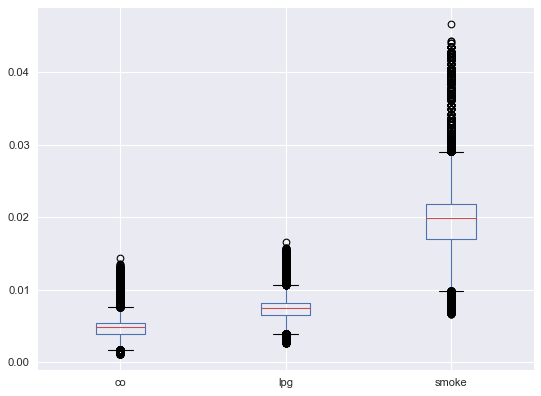

In [18]:
from matplotlib.pyplot import figure 
figure(figsize=(8,6), dpi=80)
df.boxplot(column=['co', 'lpg', 'smoke'])
plt.show()

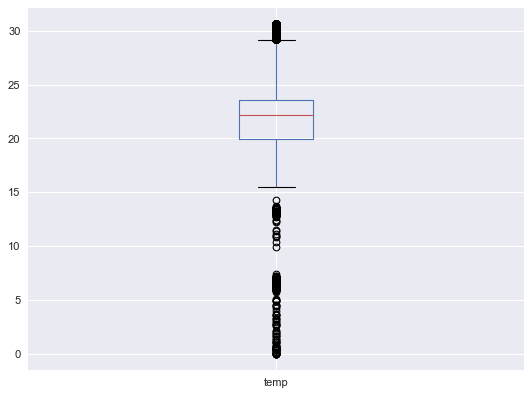

In [19]:
figure(figsize=(8,6),dpi=80)
df.boxplot(column='temp')
plt.show()

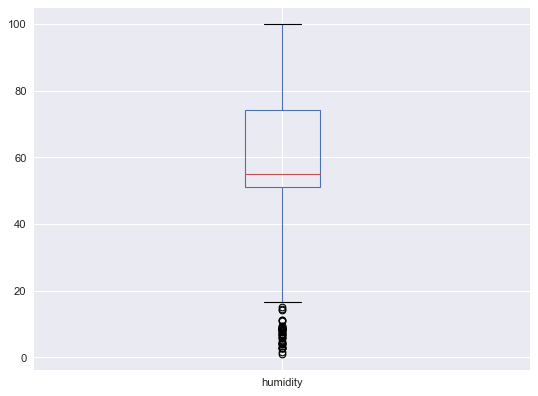

In [20]:
figure(figsize=(8,6),dpi=80)
df.boxplot(column='humidity')
plt.show()

<p>A partir dos três gráficos de boxplots mostrado, visto que existe outliers neste conjunto de dados.</p>

<h2> Resumo estatística descritiva </h2>

In [21]:
df.describe()

,co,humidity,lpg,smoke,temp
count,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000
mean,0.004639,60.511694,0.007237,0.019264,22.453987
std,0.001250,11.366489,0.001444,0.004086,2.698347
min,0.001171,1.100000,0.002693,0.006692,0.000000
25%,0.003919,51.000000,0.006456,0.017024,19.900000
50%,0.004812,54.900000,0.007489,0.019950,22.200000
75%,0.005409,74.300003,0.008150,0.021838,23.600000
max,0.014420,99.900002,0.016567,0.046590,30.600000


<h2> Gráficos de distribuição

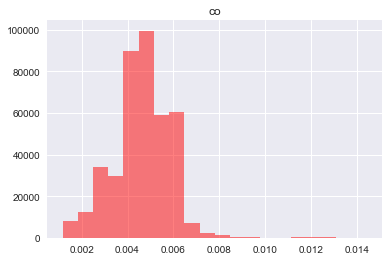

In [22]:
ax = df.hist(column='co', bins=20, alpha =0.5, color ='r')
plt.show()

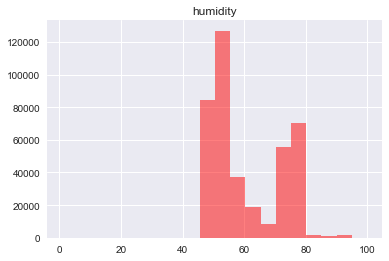

In [23]:
ax = df.hist(column='humidity', bins=20, alpha =0.5, color ='r')
plt.show()

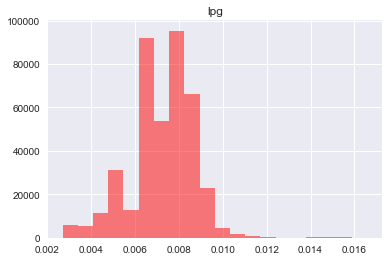

In [24]:
ax = df.hist(column='lpg', bins=20, alpha =0.5, color ='r')
plt.show()

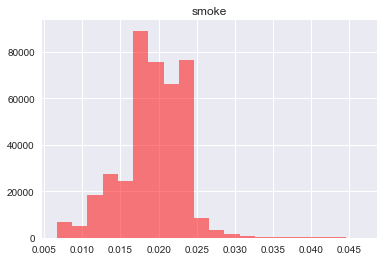

In [25]:
ax = df.hist(column='smoke', bins=20, alpha =0.5, color ='r')
plt.show()

<h2> Análise de Correlação </h2>

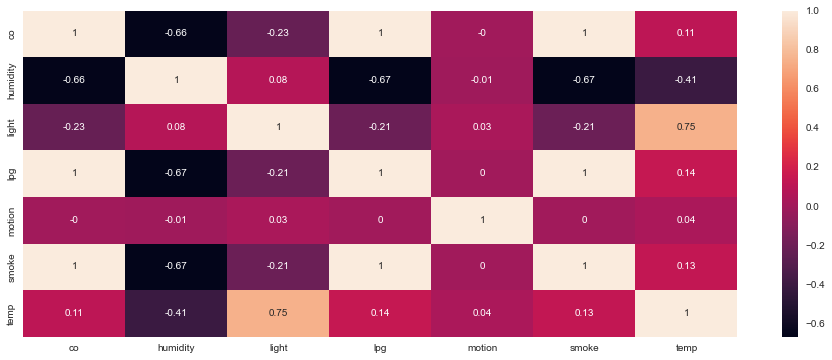

In [26]:
correlation = df.corr().round(2)
plt.figure(figsize = (16,6))
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)
plt.show()